In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler , StandardScaler,FunctionTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline,make_pipeline

In [2]:
dataset=pd.read_csv("heart.csv")

In [3]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
min_max_scaller=MinMaxScaler(feature_range=(0,1))
standart_scaler=StandardScaler()
standart_scaler_sparse_matrix=StandardScaler(with_mean=False)

In [5]:
dataset["trestbps_scalled"]=min_max_scaller.fit_transform(dataset[["trestbps"]])

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_scalled
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.292453
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.433962
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.481132
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.509434
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.415094


In [7]:
dataset["chol_scalled"]=standart_scaler.fit_transform(dataset[["chol"]])

In [8]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_scalled,chol_scalled
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.292453,-0.659332
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.433962,-0.833861
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.481132,-1.396233
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.509434,-0.833861
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.415094,0.930822


#  custom transformer

In [9]:
log_tr=FunctionTransformer(np.log, inverse_func=np.exp)

In [10]:
dataset["chol_custom_scalled"]=log_tr.transform(dataset[["chol"]])

In [11]:
dataset.head(-5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_scalled,chol_scalled,chol_custom_scalled
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.292453,-0.659332,5.356586
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.433962,-0.833861,5.313206
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.481132,-1.396233,5.159055
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.509434,-0.833861,5.313206
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.415094,0.930822,5.683580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0,0.320755,-0.581764,5.375278
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0,0.415094,0.698116,5.641907
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0,0.273585,0.698116,5.641907
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0,0.150943,-1.435017,5.147494


In [12]:
class StandardScale(BaseEstimator,TransformerMixin):
    def __init__(self,with_mean=True):
        self.with_mean=with_mean
        
    def fit(self,X, y=None):
        X=check_array(X)
        self.mean_=X.mean(axis=0)
        self.scale_=X.std(axis=0)
        self.n_features_in_=X.shape[1]
        return self
       
    
    def transform(self,X):
        check_is_fitted(X)
        X=check_array(X)
        assert self.n_features_in_==X.shape[1]
        if self.with_mean_:
            X=X-self.mean_
        return self

# pipeline

In [13]:
from sklearn.impute import SimpleImputer
pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("standardize",StandardScaler(with_mean=True))
])

In [35]:
y=dataset["target"]

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [51]:
dataset.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
columns_to_drop = ["target"]
dataset.drop(columns=columns_to_drop, inplace=True, axis=1)


In [54]:
X=dataset

In [55]:

from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [56]:

model=linear.fit(X,y)

In [57]:
import joblib
joblib.dump(model,"save_model/scaling.pkl")

['save_model/scaling.pkl']

In [58]:
new_model=joblib.load("save_model/scaling.pkl")

In [59]:
x=[[58,0,0,100,248,0,0,122,0,1.0,1,0,2]]

C:\Users\USMAN KHALID\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 3. LinearRegression expected <= 2.

In [60]:
pred=new_model.predict(x)

C:\Users\USMAN KHALID\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
np.max(pred)

0.636799832524236

In [62]:
y[5]

1

In [63]:
from sklearn.model_selection import cross_val_predict ,cross_val_score

In [65]:
from sklearn.metrics import precision_recall_curve

# threshold

In [71]:
from matplotlib import pyplot as plt


In [78]:
score_pred=cross_val_predict(model,X,y)

In [80]:
prec,recalls,threshold=precision_recall_curve(y,score_pred)

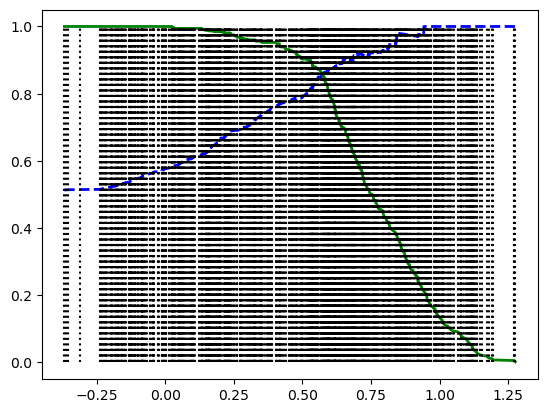

In [84]:
plt.plot(threshold,prec[:-1],'b--',label='Precision',linewidth=2)
plt.plot(threshold,recalls[:-1],'g-',label='Recall',linewidth=2)
plt.vlines(threshold,0,1.0,'k','dotted',label='threshold')
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr_clasifier=OneVsRestClassifier